## <strong>Step 2. Data Cleaning and Preparation</strong>

### <strong>1. What is the meaning of each column?</strong>

1) `p_id`: id of the product
2) `p_name`: name of the product
3) `p_id_shop`: shop id that sells the product
4) `p_shop_name`: shop name that sells the product
5) `p_brand` : brand of the product
6) `p_categories`: category of the product
7) `p_day_created`: number of days the product was created since data collection
8) `p_sold_quantity`: number of products sold
9) `p_original_price`: original price of the product
10) `p_current_price`: current price of the product
11) `p_discount_rate` : discount rate of the product

#### <strong>Import the necessary libraries</strong>

In [1]:
import numpy as np
import pandas as pd

#### <strong>Reading the data</strong>

In [2]:
tiki_data = pd.read_csv('../../../data/raw/products_detail.csv')   
tiki_data.head()

,p_id,p_name,p_id_shop,p_shop_name,p_brand,p_categories,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,38510.0,JoyMall LocknLock Chính Hãng,LocknLock,Bình giữ nhiệt,659.0,702,528000,269000,49
1,53789448,"Bộ cây lau nhà tự vắt thông minh, chổi lau nhà...",96639.0,Parroti Store,Parroti,Nhà Cửa - Đời Sống,974.0,12844,799000,429000,46
2,212830295,( hàng sẵn )squyshi to bự,318926.0,Squishy,OEM,Root,8.0,0,59000,59000,0
3,13334313,Bộ 6 chén (bát) cơm sứ phong cách Nhật Bản hoa...,3340.0,Công ty TNHH TM Minh Gia Lợi,OEM,Nhà Cửa - Đời Sống,1372.0,938,209000,209000,0
4,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,1.0,Tiki Trading,LocknLock,Bình giữ nhiệt,593.0,10359,473000,235000,50


#### <strong>Understanding the data </strong>

In [3]:
tiki_data.shape

(1976, 11)

In [4]:
tiki_data.describe()

,p_id,p_id_shop,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
count,1.976000e+03,1972.000000,1968.000000,1976.000000,1.976000e+03,1.976000e+03,1976.000000
mean,1.137176e+08,118776.864604,994.444614,611.413968,4.448611e+05,3.576897e+05,16.437247
std,6.390670e+07,95339.355321,16623.927494,1577.594227,2.708963e+06,2.466523e+06,19.897360
min,3.729300e+05,1.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.796516e+07,25156.000000,259.000000,33.000000,4.987500e+04,4.375000e+04,0.000000
50%,1.157376e+08,109746.000000,521.000000,154.000000,1.250000e+05,1.080000e+05,4.000000
75%,1.749457e+08,189957.750000,904.000000,549.500000,2.890000e+05,2.100000e+05,35.000000
max,2.139635e+08,320802.000000,737825.000000,23009.000000,6.890000e+07,6.890000e+07,95.000000


### <strong>2. What is the current data type of each column? Are there columns having inappropriate data types?</strong>

In [5]:
tiki_data.dtypes

p_id                  int64
p_name               object
p_id_shop           float64
p_shop_name          object
p_brand              object
p_categories         object
p_day_created       float64
p_sold_quantity       int64
p_original_price      int64
p_current_price       int64
p_discount_rate       int64
dtype: object

There are 4 columns with the datatype of `object`: "p_name", "p_category", "p_shop_name", "p_branch". In Pandas, `object` types usually refer to strings. And this is not an exception in this case. 

In [6]:
def open_object_dtype(s):
    dtypes = set(s.apply(type))
    return dtypes

In [7]:
print(open_object_dtype(tiki_data['p_name']))
print(open_object_dtype(tiki_data['p_categories']))
print(open_object_dtype(tiki_data['p_shop_name']))
print(open_object_dtype(tiki_data['p_brand']))

{<class 'str'>}
{<class 'str'>, <class 'float'>}
{<class 'str'>, <class 'float'>}
{<class 'str'>, <class 'float'>}


In [8]:
tiki_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   p_id              1976 non-null   int64  
 1   p_name            1976 non-null   object 
 2   p_id_shop         1972 non-null   float64
 3   p_shop_name       1972 non-null   object 
 4   p_brand           1975 non-null   object 
 5   p_categories      1972 non-null   object 
 6   p_day_created     1968 non-null   float64
 7   p_sold_quantity   1976 non-null   int64  
 8   p_original_price  1976 non-null   int64  
 9   p_current_price   1976 non-null   int64  
 10  p_discount_rate   1976 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 169.9+ KB


In [9]:
# split category from p_categories column 
category = tiki_data['p_categories'].str.split(',', expand=True)
tiki_data.drop(['p_categories'], axis=1, inplace=True)
tiki_data.insert(2, 'p_categories', category[0])
tiki_data.head()

,p_id,p_name,p_categories,p_id_shop,p_shop_name,p_brand,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,Bình giữ nhiệt,38510.0,JoyMall LocknLock Chính Hãng,LocknLock,659.0,702,528000,269000,49
1,53789448,"Bộ cây lau nhà tự vắt thông minh, chổi lau nhà...",Nhà Cửa - Đời Sống,96639.0,Parroti Store,Parroti,974.0,12844,799000,429000,46
2,212830295,( hàng sẵn )squyshi to bự,Root,318926.0,Squishy,OEM,8.0,0,59000,59000,0
3,13334313,Bộ 6 chén (bát) cơm sứ phong cách Nhật Bản hoa...,Nhà Cửa - Đời Sống,3340.0,Công ty TNHH TM Minh Gia Lợi,OEM,1372.0,938,209000,209000,0
4,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,Bình giữ nhiệt,1.0,Tiki Trading,LocknLock,593.0,10359,473000,235000,50


### <strong>3. With each column, how are values distributed?</strong>
-  We will do the following steps: 
1. Fixing invalid values
2. Checking duplicates and removing them 
3. Checking missing values and removing them

#### <strong>1. <i>Fixing invalid values.</i><strong>

In [10]:
tiki_data['p_name'].unique()

array(['Bình Giữ Nhiệt Lock&Lock Energetic One-Touch Tumbler LHC3249 - 550ML',
       'Bộ cây lau nhà tự vắt thông minh, chổi lau nhà 360 độ, lau sạch khô nhanh - Parroti Pro PR01',
       '( hàng sẵn )squyshi to bự', ...,
       'Bộ 6 nĩa inox 304 DandiHome 2020 cao cấp, sang trọng, tinh tế',
       'Cưa cành cây gấp gọn cưa đa năng Nhật Bản',
       'Cưa Cầm Tay Lưỡi Thẳng Deli Chính Hãng - Lưỡi Cưa Kim Loại Chắc Chắn, Sắc Bén - Bao Bảo Vệ An Toàn - DL580924'],
      dtype=object)

<AxesSubplot:>

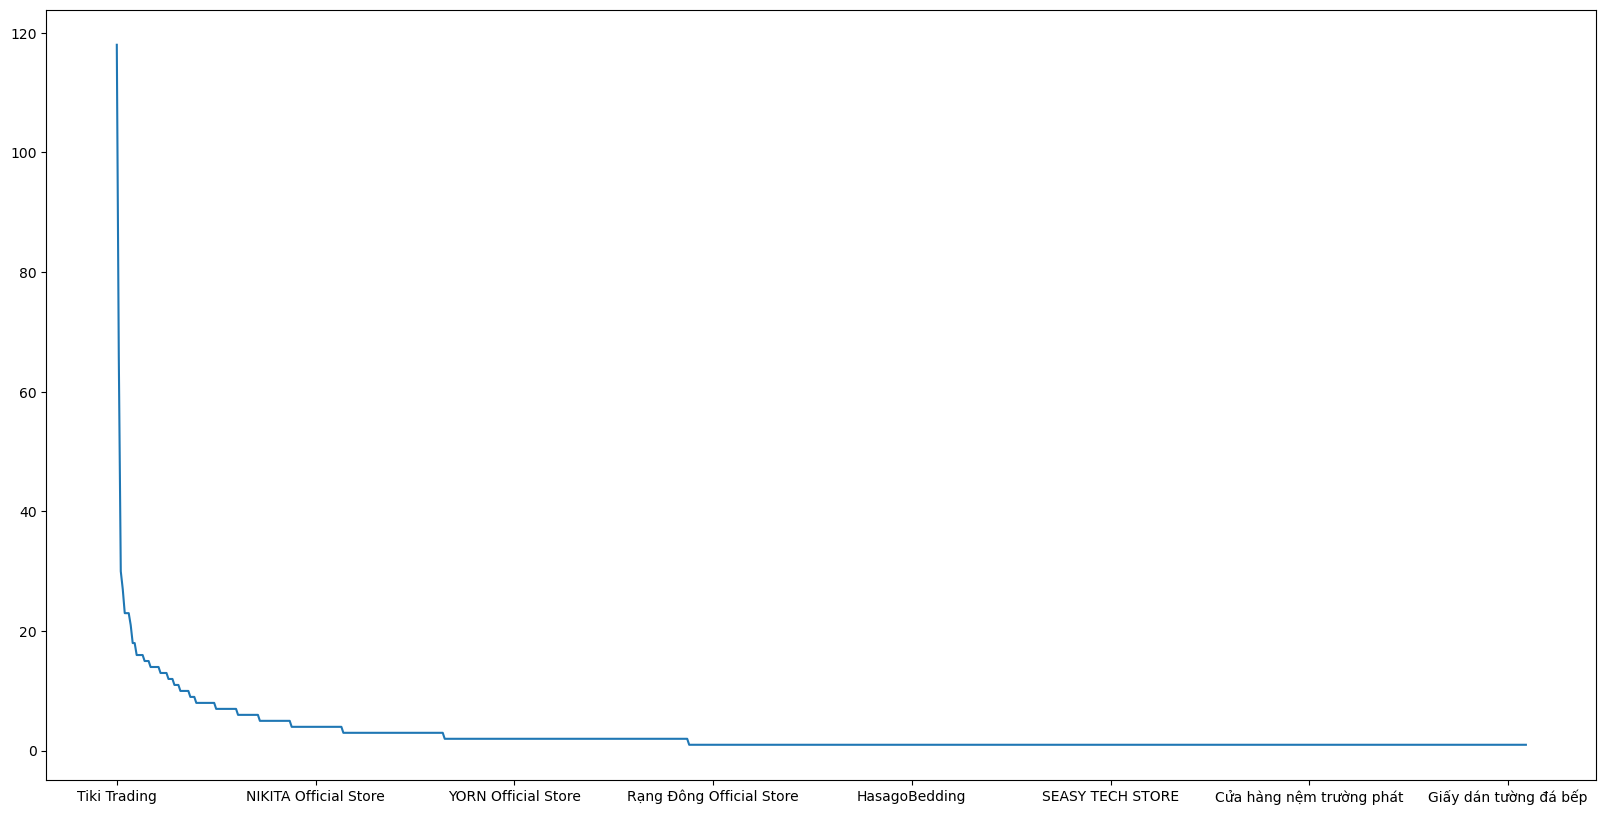

In [11]:
tiki_data['p_shop_name'].value_counts().plot(kind='line', figsize=(20, 10)) 

In [12]:
tiki_data['p_categories'].unique()

array(['Bình giữ nhiệt', 'Nhà Cửa - Đời Sống', 'Root', 'Bộ ga', 'Giá',
       'Phụ kiện nhà bếp khác', 'Ổ cắm', 'Dụng cụ xay', 'Hạt giống',
       'Thùng rác', 'Hộp đựng thực phẩm', 'Dụng cụ lau nhà khác',
       'Sofa/ salon và phụ kiện', 'Dụng cụ Cắt-Gọt-Bào', 'Khăn',
       'Nội thất phòng ngủ khác', 'Ly', 'Trang trí nhà cửa khác',
       'Lư trầm', 'Chảo các loại', 'Pin tiểu', 'Dao các loại', 'Bàn chải',
       'Nội thất phòng học', 'Khác', 'Kệ & Tủ', 'Ron', 'Đèn khác',
       'Phân bón', 'Vỏ gối', 'Bàn ghế làm việc', 'Chổi', 'Chăn',
       'Túi đựng rác', 'Bóng đèn', 'Phụ kiện phòng ngủ khác',
       'Dụng cụ vệ sinh khác', 'Phụ kiện giặt ủi khác', 'Tủ', 'Đèn bàn',
       'Đèn diệt côn trùng', 'Thảm chùi chân',
       'Vòi nước và phụ kiện tưới cây', 'Chiếu', 'Áo mưa',
       'Dụng cụ diệt côn trùng khác', 'Gối các loại', 'Đồng hồ để bàn',
       'Ruột gối', 'Chậu', 'Màng nhôm', 'Cây lăn bụi', 'Kệ nhà bếp',
       'Túi giặt', 'Móc treo', 'Bình đựng nước', 'Hóa chất', 'Xửng hấp',
 

#### As we can see, there are categories named "Root" and "Giá" not mean as a category. 

In [13]:
# count number of category have name 'Root'
print('Number category have name "Root": ', tiki_data['p_categories'].value_counts()['Root'])

# count number of category have name 'Giá'
print('Number category have name "Giá": ', tiki_data['p_categories'].value_counts()['Giá'])

Number category have name "Root":  141
Number category have name "Giá":  42


#### The number of categories named "Root" and "Giá" is quite small (166+38/2000), So to avoid data confusion, we will delete it.

In [14]:
# drop row have category name 'Root' or "Giá"
tiki_data = tiki_data[tiki_data['p_categories'] != 'Root']
tiki_data = tiki_data[tiki_data['p_categories'] != 'Giá']

In [15]:
tiki_data.shape

(1793, 11)

#### As we know, in terms of product price (p_original_price) there is almost no price of 0. So we will check our data has such values.

In [16]:
count = 0

for x in tiki_data.index:
  if tiki_data.loc[x, "p_original_price"] == 0:
    count += 1
    print(tiki_data.loc[x, "p_name"])

print('\nNumber of row have p_original_price = 0: ', count)

Khăn lau mặt Khăn tắm Sợi bông Mềm mại Thấm nước tốt 34x75cm Màu trơn Nhấn 3 đường viền
Kệ Đỡ Màn Hình Máy Tính Monitor Stand Walnut Plyconcept MSM01003 (490 x 200 mm) - Nâu Đậm
[ Gift ] Áo thun ngắn tay Bosch, size ngẫu nhiên
Dụng cụ gọt vỏ inox 304 DandiHome
Bộ lau nhà tách nước bẩn Kitimop K22 Plus có thùng vắt xoay tròn cao cấp, chổi lau nhà 360 độ lau sạch khô nhanh

Number of row have p_original_price = 0:  5


#### As we can see above, the products have a price(p_original_price) of 0. So we will delete these rows.

In [17]:
# drop row have p_original_price = 0
tiki_data = tiki_data[tiki_data['p_original_price'] != 0]
tiki_data.head()

,p_id,p_name,p_categories,p_id_shop,p_shop_name,p_brand,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
0,83412126,Bình Giữ Nhiệt Lock&Lock Energetic One-Touch T...,Bình giữ nhiệt,38510.0,JoyMall LocknLock Chính Hãng,LocknLock,659.0,702,528000,269000,49
1,53789448,"Bộ cây lau nhà tự vắt thông minh, chổi lau nhà...",Nhà Cửa - Đời Sống,96639.0,Parroti Store,Parroti,974.0,12844,799000,429000,46
3,13334313,Bộ 6 chén (bát) cơm sứ phong cách Nhật Bản hoa...,Nhà Cửa - Đời Sống,3340.0,Công ty TNHH TM Minh Gia Lợi,OEM,1372.0,938,209000,209000,0
4,99868980,Bình Giữ Nhiệt Locknlock Bucket Tumbler LHC426...,Bình giữ nhiệt,1.0,Tiki Trading,LocknLock,593.0,10359,473000,235000,50
5,115092053,Bộ ga giường poly cotton LIDACO drap giường đ...,Bộ ga,43482.0,Lidaco Official Store,LIDACO,529.0,2338,106000,89000,16


#### <strong>2. <i>Checking duplicates and removing them.</i></strong>

In [18]:
# check duplicate p_name columns 
tiki_data['p_name'].duplicated().sum()

4

#### We see that the number of identical elements of the name column is 4. So we will delete these rows to avoid data confusion.

In [19]:
# if duplicated, then show the row
tiki_data[tiki_data['p_name'].duplicated(keep=False)].sort_values('p_name')

,p_id,p_name,p_categories,p_id_shop,p_shop_name,p_brand,p_day_created,p_sold_quantity,p_original_price,p_current_price,p_discount_rate
1388,14448546,Bình Gas Bơm Bật Lửa BlueSky,Than,67417.0,Shop AZ,OEM,1353.0,2,85000,85000,0
1594,204036532,Bình Gas Bơm Bật Lửa BlueSky,Than,253455.0,CỬA HÀNG 108,OEM,62.0,21,65000,65000,0
1102,87302712,"Gối tựa lưng, gối trang trí sofa",Gối các loại,30472.0,kenhome,OEM,645.0,15,75000,75000,0
1342,87302519,"Gối tựa lưng, gối trang trí sofa",Gối các loại,30472.0,kenhome,OEM,645.0,240,75000,75000,0
249,88241130,"Khăn trải bàn nhựa PVC không thấm nước, khăn t...",Phụ kiện phòng ăn khác,67869.0,Zen,SHOFUKA,642.0,1322,35000,35000,0
403,88222310,"Khăn trải bàn nhựa PVC không thấm nước, khăn t...",Phụ kiện phòng ăn khác,67869.0,Zen,SHOFUKA,642.0,1441,39000,39000,0
229,90531871,"Đèn Pixar, Đèn Bàn Học Chống Cận Thị, Đèn Đọc ...",Đèn bàn,97355.0,Future Store,Moontronics,632.0,3028,190000,169000,11
965,90530495,"Đèn Pixar, Đèn Bàn Học Chống Cận Thị, Đèn Đọc ...",Đèn bàn,97355.0,Future Store,Moontronics,NaN,537,310000,259000,16


In [20]:
# drop duplicate p_name columns
tiki_data.drop_duplicates(subset='p_name', keep='first', inplace=True)
tiki_data.shape

(1784, 11)

#### <strong>3. <i>Checking missing values and removing them.</i></strong>

In [21]:
tiki_data.isnull().sum()

p_id                0
p_name              0
p_categories        0
p_id_shop           0
p_shop_name         0
p_brand             1
p_day_created       7
p_sold_quantity     0
p_original_price    0
p_current_price     0
p_discount_rate     0
dtype: int64

#### <b>Because p_brand and p_day_created have a large number of missing values, we will delete these row in this columns</b>

#### Currently, there are still a few products with unknown date of creation, so we will delete them to avoid misinterpretation of the data, along with deleting more products with null brand names.

In [22]:
tiki_data.dropna(subset=['p_day_created', 'p_brand'], inplace=True)
tiki_data.isnull().sum()

p_id                0
p_name              0
p_categories        0
p_id_shop           0
p_shop_name         0
p_brand             0
p_day_created       0
p_sold_quantity     0
p_original_price    0
p_current_price     0
p_discount_rate     0
dtype: int64

### <b>And then after delete rows have missing value -> not have missing value</b>

### Save file 

In [23]:
# save data to csv file
tiki_data.to_csv('../../../data/processed/tiki_data.csv', index=False)